## Notebook 1:
---

#### Import `python` libraries:

In [1]:
import os
import re
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
# from this repo:
from functions.utils import get_files
from functions.utils import realign_data, shift_data, find_middle

data_dir = os.path.abspath('../data/simplified_heatmap_data')
output_dir = os.path.abspath('../outputs/heatmaps')
print(data_dir)
print(output_dir)

data_folders = get_files(data_dir + '/*')

plt.style.use('seaborn')
plt.rcParams.update({"text.usetex": True})

/Users/xxie/sample_data/mitchell_sample_images/data/simplified_heatmap_data
/Users/xxie/sample_data/mitchell_sample_images/outputs/heatmaps


### Load data and sanity check:

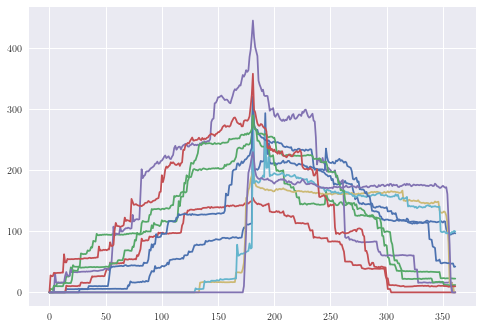

In [2]:
# Get folder specific data and split into color channels
data_files = get_files(data_folders[0] + '/*.csv')

cyan_data = [val for val in data_files if re.search(r'cyan\.csv', val)]
yellow_data = [val for val in data_files if re.search(r'yellow\.csv', val)]
magenta_data = [val for val in data_files if re.search(r'(mag|magenta)\.csv', val)]
assert len(cyan_data)==len(yellow_data)==len(magenta_data)

# Get dims
dims = []
for f in cyan_data:
    df = pd.read_csv(f)
    d = list(df.values.shape)
    dims.append(d)

x = np.array(dims, dtype=int)
max_rows = x[:,0].max()
max_cols = x[:,1].max()

# Pre-allocate array of maximum size
cyan = np.zeros([max_rows, max_cols*2, len(cyan_data)])
# Find middle points for alignment
row_mid = find_middle(cyan[:,0,0])
col_mid = find_middle(cyan[0,:,0])

# Get data into 3D Array: [Ntimes x Nvpix x Nfiles]
for i, fname in enumerate(cyan_data):
    # Load CSV, skip header (top label row)
    data = np.genfromtxt(fname, delimiter = ',', skip_header=1)
    # remove artifactual frames:
#     data = data[:,5:]
    #data = np.delete(data, np.where(data.mean(axis=0)>300), 1)
    # align
    ydiff = row_mid - find_middle(data[:,0])
    for j, row in enumerate(data):
        peak = np.argmax(row)
        xdiff = col_mid - peak
        cyan[ydiff+j, 0 + xdiff:xdiff+len(data[0,:]), i] = row

# plot mean over all times for all files:
plt.plot(np.mean(cyan, axis=0));

## Sort and re-align one heatmap at a time:

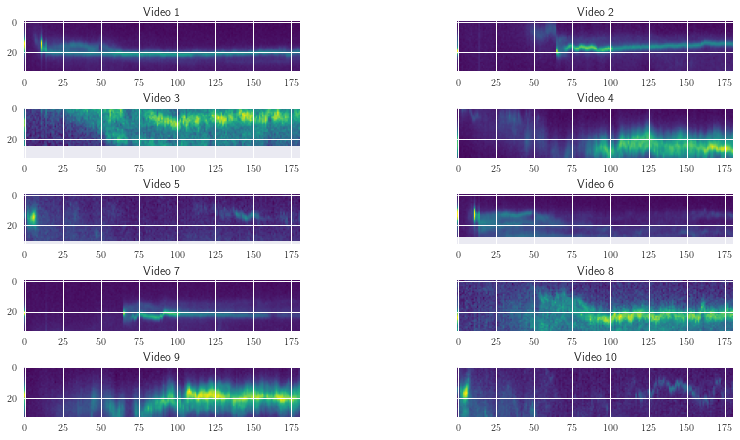

In [19]:
axs = plt.figure(figsize=(12,6), constrained_layout=True).subplots(5,2,sharey=True)

for i, ax in enumerate(axs.flat):
    data = np.genfromtxt(cyan_data[i], delimiter=',', skip_header=1)
    ax.imshow(data, cmap='viridis')
    ax.title.set_text('Video {}'.format(i+1))

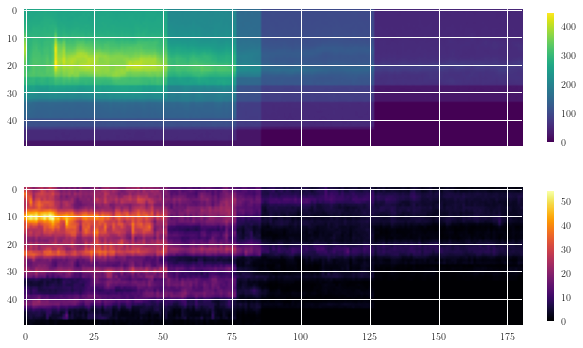

In [116]:
# get reference frames:
refs = []
imgs = np.zeros((50,181))
sigs = np.zeros_like(imgs)
for i, fname in enumerate(cyan_data):
    data = np.genfromtxt(fname, delimiter = ',', skip_header=1)
    sigy = np.genfromtxt(yellow_data[i], delimiter = ',', skip_header=1)
    dims = data.shape
    refs.append(int(re.search('ref-(\d*)', fname).group(1)))
    ref_diff = refs[i] - refs[0]
#     imgs[:dims[0], ref_diff:] += data[:, ref_diff:]
#     sigs[:dims[0], ref_diff:] += sigy[:, ref_diff:]
    imgs[:dims[0], :dims[1]-ref_diff] += data[:, ref_diff:]
    sigs[:dims[0], :dims[1]-ref_diff:] += sigy[:, ref_diff:]
    
    
axs = plt.figure(figsize=(8,5), constrained_layout=True).subplots(2,1,sharex=True)
im = axs[0].imshow((imgs/10), cmap='viridis')
plt.colorbar(im, ax = axs[0], location = 'right', shrink = 0.75)
ym = axs[1].imshow((sigs/10), cmap='inferno')
plt.colorbar(ym, ax = axs[1], location = 'right', shrink = 0.75)

# plt.subplot(2,1,1)
# plt.imshow(minmax_scale(imgs/10), cmap='viridis')
# plt.subplot(2,1,2)
# plt.imshow(minmax_scale(sigs/10), cmap='inferno')

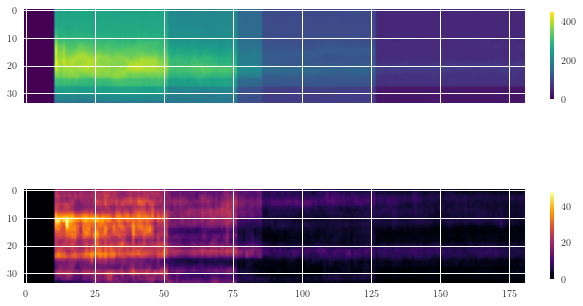

In [115]:
refs = []
ref_shape = (34,181)
imgs = np.zeros(ref_shape)
sigs = np.zeros_like(imgs)
for i, fname in enumerate(cyan_data):
    cyan = np.genfromtxt(fname, delimiter = ',', skip_header=1)
    sigy = np.genfromtxt(yellow_data[i], delimiter = ',', skip_header=1)
    dims = cyan.shape
    refs.append(int(re.search('ref-(\d*)', fname).group(1)))
    ref_diff = refs[i] - refs[0]
    dim_diff = ref_shape[0] - dims[0]
#     imgs[:, ref_diff:] = imgs[:, ref_diff:] + cyan[0:dims[0]+dim_diff, ref_diff:]
#     sigs[:, ref_diff:] = sigs[:, ref_diff:] + sigy[0:dims[0]+dim_diff, ref_diff:]
    imgs[0:dims[0], refs[0]:dims[1]-ref_diff] = imgs[0:dims[0], refs[0]:dims[1]-ref_diff] + cyan[0:dims[0]+dim_diff, refs[i]:]
    sigs[0:dims[0], refs[0]:dims[1]-ref_diff] = sigs[0:dims[0], refs[0]:dims[1]-ref_diff] + sigy[0:dims[0]+dim_diff, refs[i]:]
    
axs = plt.figure(figsize=(8,5), constrained_layout=True).subplots(2,1,sharex=True)
im = axs[0].imshow((imgs/10), cmap='viridis')
plt.colorbar(im, ax = axs[0], location = 'right', shrink = 0.5)
ym = axs[1].imshow((sigs/10), cmap='inferno')
plt.colorbar(ym, ax = axs[1], location = 'right', shrink = 0.5)

Folder 2:

In [117]:
data_files = get_files(data_folders[1] + '/*.csv')

cyan_data = [val for val in data_files if re.search(r'cyan\.csv', val)]
yellow_data = [val for val in data_files if re.search(r'yellow\.csv', val)]
magenta_data = [val for val in data_files if re.search(r'(mag|magenta)\.csv', val)]
assert len(cyan_data)==len(yellow_data)==len(magenta_data)
print("There are {} videos in this folder.".format(len(cyan_data)))

There are 10 videos in this folder.


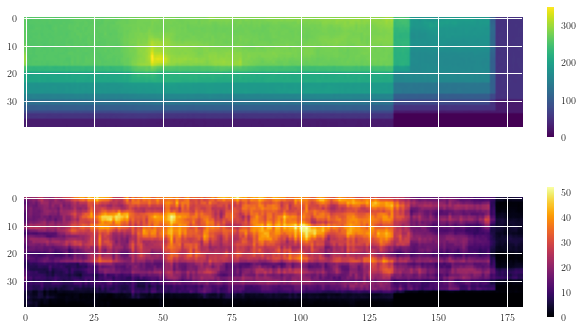

In [122]:
# get reference frames:
refs = []
imgs = np.zeros((50,181))
sigs = np.zeros_like(imgs)
for i, fname in enumerate(cyan_data):
    data = np.genfromtxt(fname, delimiter = ',', skip_header=1)
    sigy = np.genfromtxt(yellow_data[i], delimiter = ',', skip_header=1)
    dims = data.shape
    refs.append(int(re.search('ref-(\d*)', fname).group(1)))
    ref_diff = refs[i] - refs[0]
#     imgs[:dims[0], ref_diff:] += data[:, ref_diff:]
#     sigs[:dims[0], ref_diff:] += sigy[:, ref_diff:]
    imgs[:dims[0], :dims[1]-ref_diff] += data[:, ref_diff:]
    sigs[:dims[0], :dims[1]-ref_diff:] += sigy[:, ref_diff:]
    
    
axs = plt.figure(figsize=(8,5), constrained_layout=True).subplots(2,1,sharex=True)
im = axs[0].imshow((imgs/10)[0:40,:], cmap='viridis')
plt.colorbar(im, ax = axs[0], location = 'right', shrink = 0.75)
ym = axs[1].imshow((sigs/10)[0:40,:], cmap='inferno')
plt.colorbar(ym, ax = axs[1], location = 'right', shrink = 0.75)

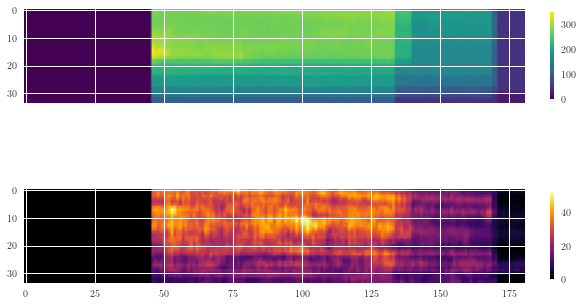

In [121]:
refs = []
ref_shape = (34,181)
imgs = np.zeros(ref_shape)
sigs = np.zeros_like(imgs)
for i, fname in enumerate(cyan_data):
    cyan = np.genfromtxt(fname, delimiter = ',', skip_header=1)
    sigy = np.genfromtxt(yellow_data[i], delimiter = ',', skip_header=1)
    dims = cyan.shape
    refs.append(int(re.search('ref-(\d*)', fname).group(1)))
    ref_diff = refs[i] - refs[0]
    dim_diff = ref_shape[0] - dims[0]
#     imgs[:, ref_diff:] = imgs[:, ref_diff:] + cyan[0:dims[0]+dim_diff, ref_diff:]
#     sigs[:, ref_diff:] = sigs[:, ref_diff:] + sigy[0:dims[0]+dim_diff, ref_diff:]
    imgs[0:dims[0], refs[0]:dims[1]-ref_diff] = imgs[0:dims[0], refs[0]:dims[1]-ref_diff] + cyan[0:dims[0]+dim_diff, refs[i]:]
    sigs[0:dims[0], refs[0]:dims[1]-ref_diff] = sigs[0:dims[0], refs[0]:dims[1]-ref_diff] + sigy[0:dims[0]+dim_diff, refs[i]:]
    
axs = plt.figure(figsize=(8,5), constrained_layout=True).subplots(2,1,sharex=True)
im = axs[0].imshow((imgs/10), cmap='viridis')
plt.colorbar(im, ax = axs[0], location = 'right', shrink = 0.5)
ym = axs[1].imshow((sigs/10), cmap='inferno')
plt.colorbar(ym, ax = axs[1], location = 'right', shrink = 0.5)

Folder 3:

In [124]:
data_files = get_files(data_folders[2] + '/*.csv')

cyan_data = [val for val in data_files if re.search(r'cyan\.csv', val)]
yellow_data = [val for val in data_files if re.search(r'yellow\.csv', val)]
magenta_data = [val for val in data_files if re.search(r'(mag|magenta)\.csv', val)]
assert len(cyan_data)==len(yellow_data)==len(magenta_data)
print("There are {} videos in this folder.".format(len(cyan_data)))

There are 8 videos in this folder.


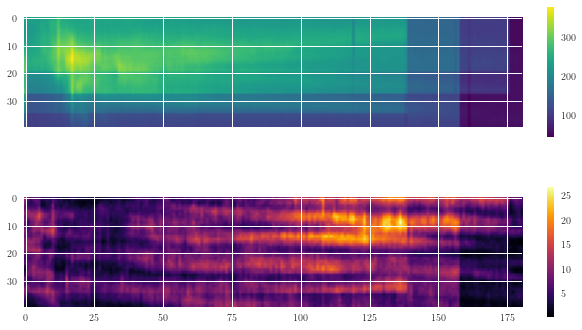

In [126]:
# get reference frames:
refs = []
imgs = np.zeros((61,181))
sigs = np.zeros_like(imgs)
for i, fname in enumerate(cyan_data):
    data = np.genfromtxt(fname, delimiter = ',', skip_header=1)
    sigy = np.genfromtxt(yellow_data[i], delimiter = ',', skip_header=1)
    dims = data.shape
    refs.append(int(re.search('ref-(\d*)', fname).group(1)))
    ref_diff = refs[i] - refs[0]
#     imgs[:dims[0], ref_diff:] += data[:, ref_diff:]
#     sigs[:dims[0], ref_diff:] += sigy[:, ref_diff:]
    imgs[:dims[0], :dims[1]-ref_diff] += data[:, ref_diff:]
    sigs[:dims[0], :dims[1]-ref_diff:] += sigy[:, ref_diff:]
    
    
axs = plt.figure(figsize=(8,5), constrained_layout=True).subplots(2,1,sharex=True)
im = axs[0].imshow((imgs/10)[0:40,:], cmap='viridis')
plt.colorbar(im, ax = axs[0], location = 'right', shrink = 0.75)
ym = axs[1].imshow((sigs/10)[0:40,:], cmap='inferno')
plt.colorbar(ym, ax = axs[1], location = 'right', shrink = 0.75)

In [128]:
cyan_data

['/Users/xxie/sample_data/mitchell_sample_images/data/simplified_heatmap_data/201017_Saturday_4_Continuous_Linescans2021315/mod-1_ref-17_cyan.csv',
 '/Users/xxie/sample_data/mitchell_sample_images/data/simplified_heatmap_data/201017_Saturday_4_Continuous_Linescans2021315/mod-1_ref-22_cyan.csv',
 '/Users/xxie/sample_data/mitchell_sample_images/data/simplified_heatmap_data/201017_Saturday_4_Continuous_Linescans2021315/mod-1_ref-40_cyan.csv',
 '/Users/xxie/sample_data/mitchell_sample_images/data/simplified_heatmap_data/201017_Saturday_4_Continuous_Linescans2021315/mod-1_ref-59_cyan.csv',
 '/Users/xxie/sample_data/mitchell_sample_images/data/simplified_heatmap_data/201017_Saturday_4_Continuous_Linescans2021315/mod-2_ref-17_cyan.csv',
 '/Users/xxie/sample_data/mitchell_sample_images/data/simplified_heatmap_data/201017_Saturday_4_Continuous_Linescans2021315/mod-2_ref-22_cyan.csv',
 '/Users/xxie/sample_data/mitchell_sample_images/data/simplified_heatmap_data/201017_Saturday_4_Continuous_Lines

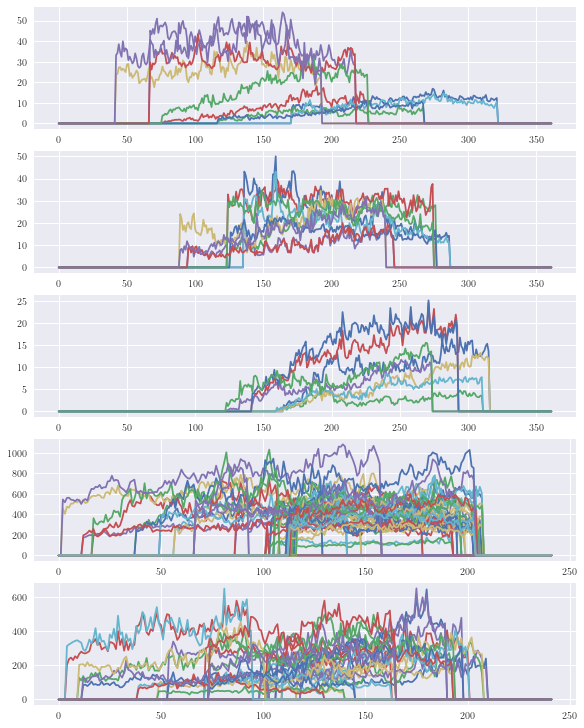

In [18]:
# Set up matplotlib
ax = plt.figure(figsize = (8,10), constrained_layout = True).subplots(5,1)
for m,folder in enumerate(data_folders):
    # Get folder specific data and split into color channels
    data_files = get_files(folder + '/*.csv')
    cyan_data = [val for val in data_files if re.search(r'cyan\.csv', val)]
    yellow_data = [val for val in data_files if re.search(r'yellow\.csv', val)]
    magenta_data = [val for val in data_files if re.search(r'(mag|magenta)\.csv', val)]
    assert len(cyan_data)==len(yellow_data)==len(magenta_data)
    # Get dims
    dims = []
    for f in yellow_data:
        df = pd.read_csv(f)
        d = list(df.values.shape)
        dims.append(d)

    x = np.array(dims, dtype=int)
    max_rows = x[:,0].max()
    max_cols = x[:,1].max()

    # Pre-allocate array of maximum size
    yellow = np.zeros([max_rows, max_cols*2, len(yellow_data)])
    # Find middle points for alignment
    row_mid = find_middle(yellow[:,0,0])
    col_mid = find_middle(yellow[0,:,0])

    # Get data into 3D Array
    for i, fname in enumerate(yellow_data):
        # Get ref frame, -1 for python indexing
        ref = int(fname.split('/')[-1].split('_')[1].split('-')[1]) - 1
        # Load CSV, skip header (top label row)
        data = np.genfromtxt(fname, delimiter = ',', skip_header=1)
        # remove artifactual frames:
        data = data[:,30:]
        # data = np.delete(data, np.where(data.mean(axis=0)>800), 1)
        # align
        ydiff = row_mid - find_middle(data[:,0])
        xdiff = col_mid - ref
        # broadcast into correct positions
        yellow[ydiff:ydiff + len(data[:,0]), 0 + xdiff:xdiff+len(data[0,:]), i] = data
    
    yellow_mean = np.mean(yellow, axis = 0)
    # yellow_mean = yellow_mean[~np.all(yellow_mean == 0, axis = 0)]

    # plot:
    ax[m].plot(yellow_mean);

3 Sets of heatmaps for cyan and yellow (aligned), first 3 folders